In [269]:
import pandas as pd
import quandl
quandl.ApiConfig.api_key = "jaPLkPG547AsNKE4kydx"
import datetime
import numpy as np

In [270]:
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date="2015-01-11", end_date="2017-11-11")
type(apple)
#Grabbing Apple's stock historical information using QUANDL API 

pandas.core.frame.DataFrame

In [271]:
apple.head()
#Returning top 5 rows of data to demonstrate successful information retrieval

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-12,112.60,112.63,108.80,109.25,49650790.0,0.0,1.0,106.970471,106.998971,103.360455,103.787957,49650790.0
2015-01-13,111.43,112.80,108.91,110.22,67091928.0,0.0,1.0,105.858966,107.160472,103.464955,104.709461,67091928.0
2015-01-14,109.04,110.49,108.50,109.80,48956588.0,0.0,1.0,103.588456,104.965962,103.075454,104.310459,48956588.0
2015-01-15,110.00,110.06,106.66,106.82,60013996.0,0.0,1.0,104.500460,104.557460,101.327446,101.479447,60013996.0
2015-01-16,107.03,107.58,105.20,105.99,78513345.0,0.0,1.0,101.678948,102.201450,99.940440,100.690943,78513345.0


In [272]:
apple.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,7.140000e+02
mean,122.855690,123.834798,121.837635,122.877348,3.951706e+07,0.008529,1.0,120.116201,121.071319,119.124309,120.138725,3.951706e+07
std,19.700744,19.678303,19.648999,19.684762,2.003374e+07,0.068483,0.0,20.530165,20.514947,20.481673,20.522923,2.003374e+07
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07,0.000000,1.0,87.955883,89.587953,87.437920,88.288161,1.147592e+07
25%,108.867500,109.800000,107.852500,108.817500,2.586218e+07,0.000000,1.0,105.850706,106.868823,104.933939,105.827925,2.586218e+07
50%,117.950000,119.209000,116.930000,118.265000,3.419323e+07,0.000000,1.0,115.021549,115.700653,114.214146,115.008947,3.419323e+07
75%,137.125000,137.435000,136.295000,136.975000,4.815227e+07,0.000000,1.0,136.014268,136.321757,135.190991,135.865483,4.815227e+07
max,175.110000,176.095000,174.270000,175.880000,1.622063e+08,0.630000,1.0,175.110000,176.095000,174.270000,175.880000,1.622063e+08


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Price of Stock in USD')

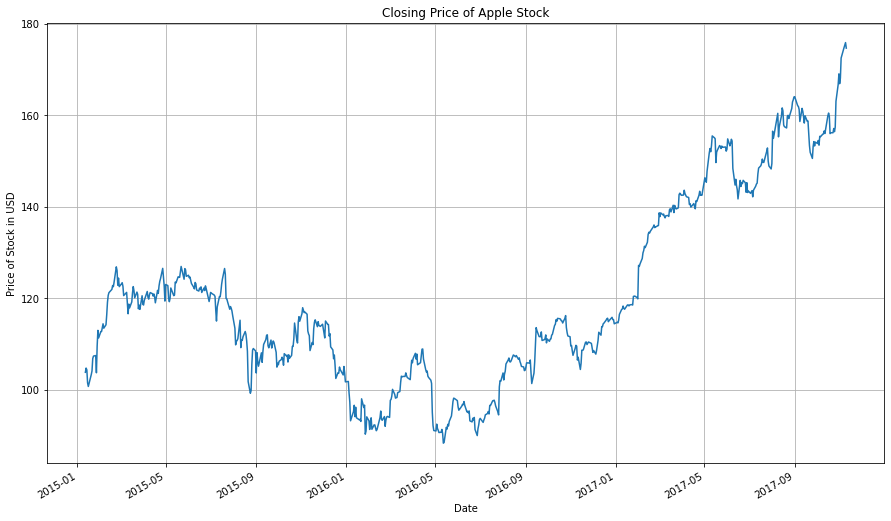

In [273]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15,9)
apple["Adj. Close"].plot(grid=True)
plt.title("Closing Price of Apple Stock")
plt.ylabel("Price of Stock in USD")
#Visualization of Data regarding Apple Stock

CandleSticks

In [274]:
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
#using mplfinance original flavor since original package is depracated, and require versitility of candlestick_ohlc
from matplotlib.dates import date2num

In [275]:
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None, title=None):
    mondays = WeekdayLocator(MONDAY)   
    #Major ticks of Monday
    alldays = DayLocator() 
    #Minor ticks of rest of days
    dayFormatter = DateFormatter('%d')      
    
    #The below is a dataframe with candlestick_ohlc data for specified periods
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    #dat parameter is dateframe object, will use aforementioned columns to determine float values of columns
    if (type(stick) == str):
        #stick is used to demonstrate period of time for the candlestick
        if stick == "day":
            plotdat = transdat
            stick = 1 
            #Rubric for plotting candlesticks
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                #Finding weeks
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) 
            elif stick == "month":
                #finding the months 
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) 
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) 
            grouped = transdat.groupby(list(set(["year",stick]))) 
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) 
            #Empty dataframe to plot our data
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365

    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) 
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))

    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
    
    #Plot parameters including axis's
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(15)
    if title != None:
        plt.title(title)
    plt.ylabel('Adjusted Share Price')
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)

    ax.grid(True)

    #creating the candlestick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "green", colordown = "red", width = stick * .4)

    #Plotting of moving averages
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)

    #Required for scaling - Stack Overflow
    ax.xaxis_date()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

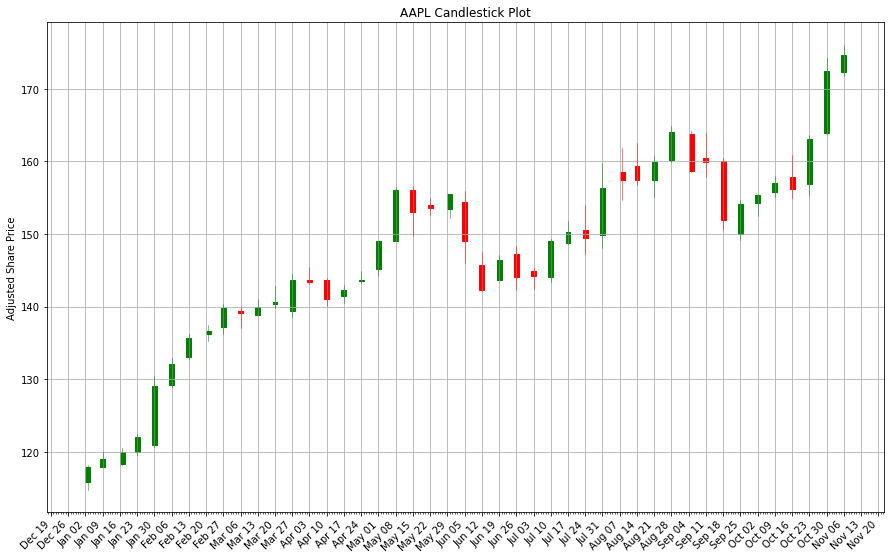

In [276]:
pandas_candlestick_ohlc(apple.loc['2017-01-01':], stick='week', title='AAPL Candlestick Plot')

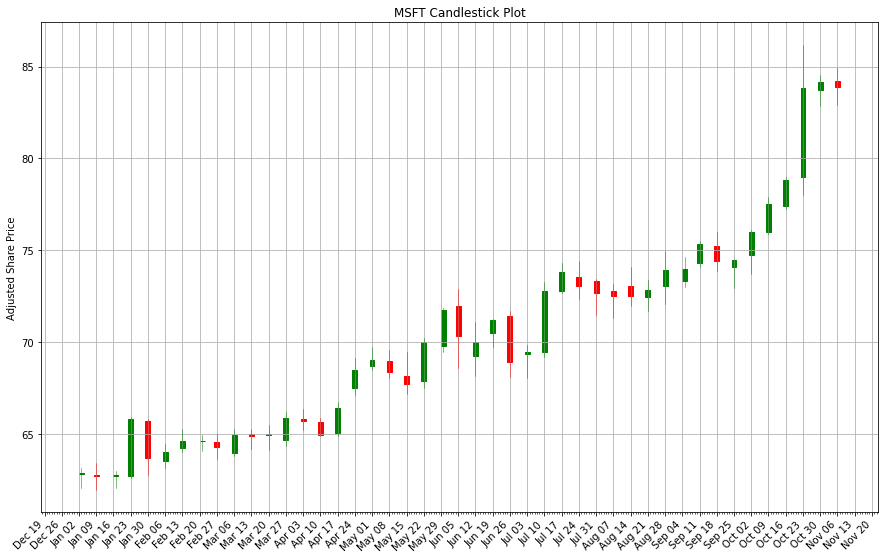

In [277]:
pandas_candlestick_ohlc(microsoft.loc['2017-01-01':], stick='week', title='MSFT Candlestick Plot')

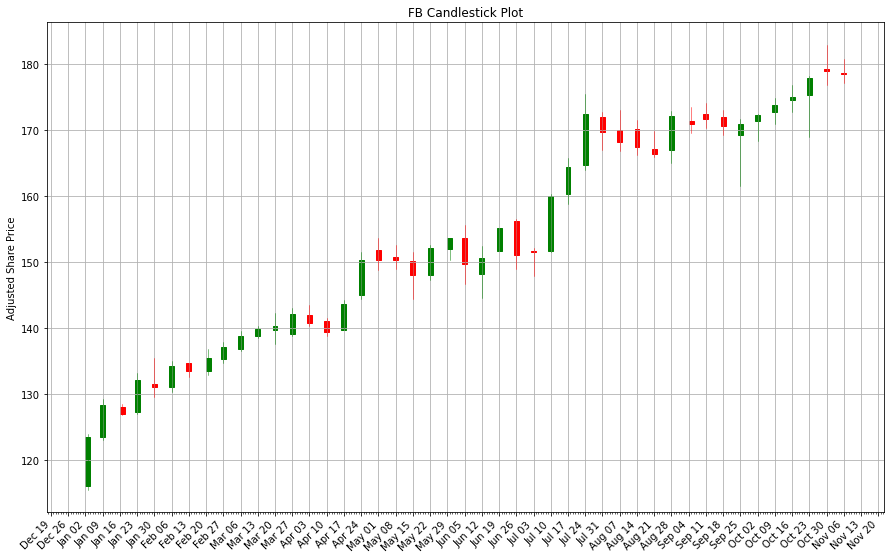

In [278]:
pandas_candlestick_ohlc(facebook.loc['2017-01-01':], stick='week', title='FB Candlestick Plot')

Direct Comparison of 3 Main Stocks: Microsoft, Facebook, and Apple


In [279]:
microsoft, facebook = (quandl.get("WIKI/" + s, start_date = "2015-01-11", end_date = "2017-11-11") for s in ["MSFT", "FB"])

stocks = pd.DataFrame({"AAPL": apple["Adj. Close"], 
                      "MSFT": microsoft["Adj. Close"],
                      "FB": facebook["Adj. Close"]})

stocks.head()

,AAPL,MSFT,FB
Date,,,
2015-01-12,103.787957,43.196000,76.72
2015-01-13,104.709461,42.968896,76.45
2015-01-14,104.310459,42.598115,76.28
2015-01-15,101.479447,42.157813,74.05
2015-01-16,100.690943,42.862297,75.18


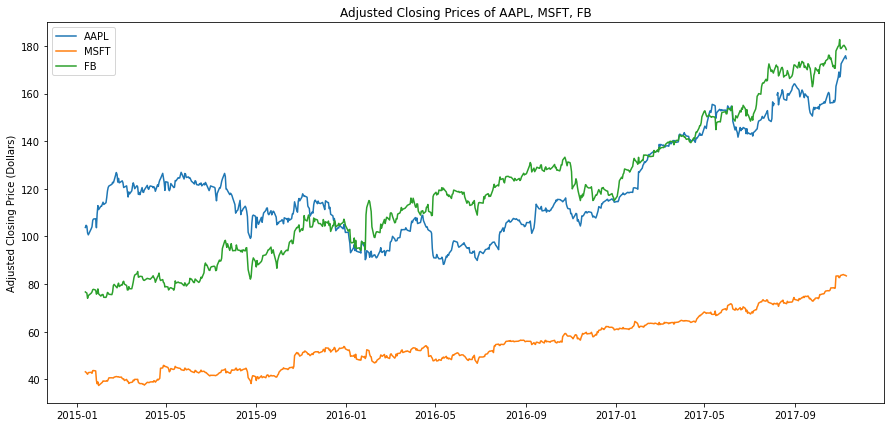

In [280]:
plt.figure(figsize=(15,7))
plt.plot(stocks)
plt.title('Adjusted Closing Prices of ' + ', '.join(stocks.columns))
plt.ylabel('Adjusted Closing Price (Dollars)')
plt.legend(stocks.columns)

In [281]:
stock_returns = stocks.apply(lambda price: price/price[0])


In [282]:
stock_returns.head()

,AAPL,MSFT,FB
Date,,,
2015-01-12,1.000000,1.000000,1.000000
2015-01-13,1.008879,0.994742,0.996481
2015-01-14,1.005034,0.986159,0.994265
2015-01-15,0.977757,0.975966,0.965198
2015-01-16,0.970160,0.992275,0.979927


Text(0, 0.5, 'Return Ratio')

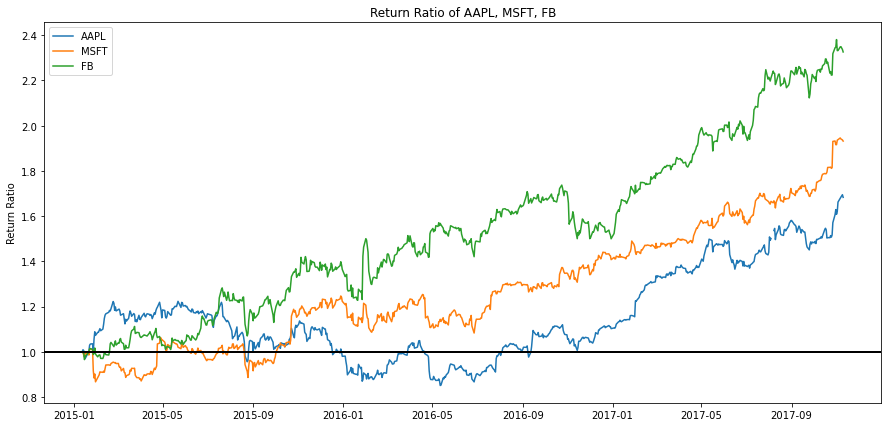

In [283]:
plt.figure(figsize=(15,7))
plt.plot(stock_returns)
plt.axhline(y=1, color='black', lw=2)
plt.legend(stock_returns.columns, loc=2)
plt.title('Return Ratio of ' + ', '.join(stocks.columns))
plt.ylabel('Return Ratio')

The Moving Averages of Our 3 Stocks


In [284]:
apple['20d'] = apple['Close'].rolling(window=20, center=False).mean()

In [285]:
microsoft['20d'] = microsoft['Close'].rolling(window=20, center=False).mean()

In [286]:
facebook['20d'] = facebook['Close'].rolling(window=20, center=False).mean()

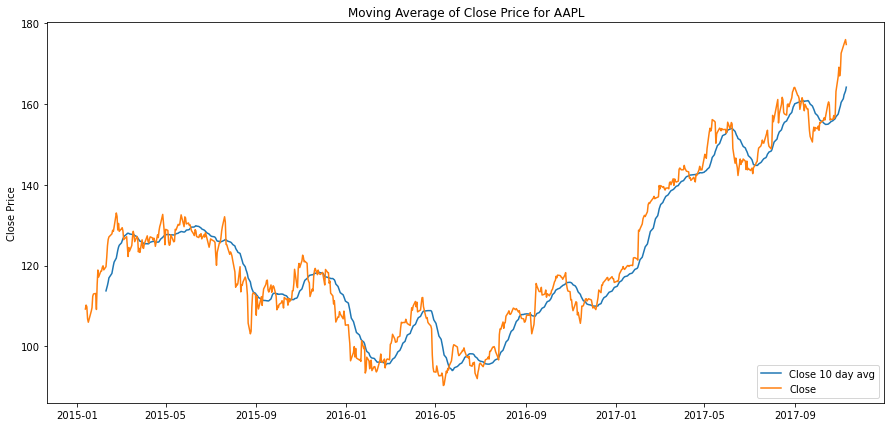

In [287]:
def plot_roll_avg_apple():
    start = '2015-1-1'
    plt.figure(figsize=(15,7))    
    plt.plot(apple.loc[start:, '20d'], label='Close 10 day avg')
    plt.plot(apple.loc[start:, 'Close'], label='Close')
    plt.legend(loc=4)
    plt.title('Moving Average of Close Price for AAPL')
    plt.ylabel('Close Price')
plot_roll_avg_apple()

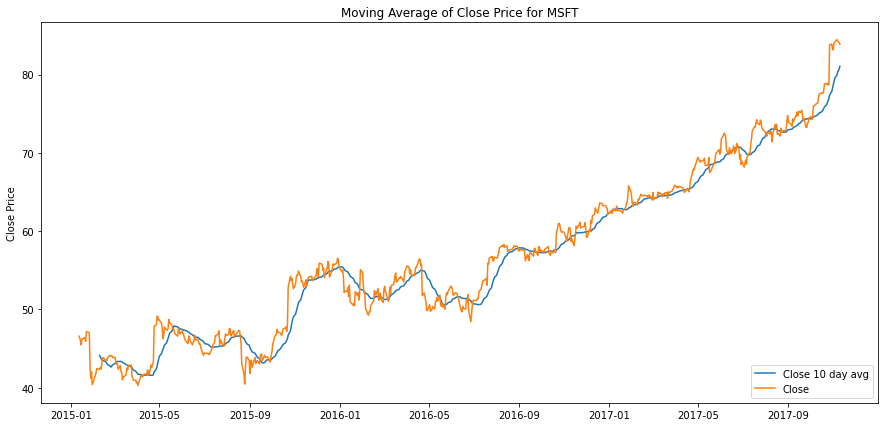

In [288]:
def plot_roll_avg_microsoft():
    start = '2015-1-1'
    plt.figure(figsize=(15,7))    
    plt.plot(microsoft.loc[start:, '20d'], label='Close 10 day avg')
    plt.plot(microsoft.loc[start:, 'Close'], label='Close')
    plt.legend(loc=4)
    plt.title('Moving Average of Close Price for MSFT')
    plt.ylabel('Close Price')
plot_roll_avg_microsoft()

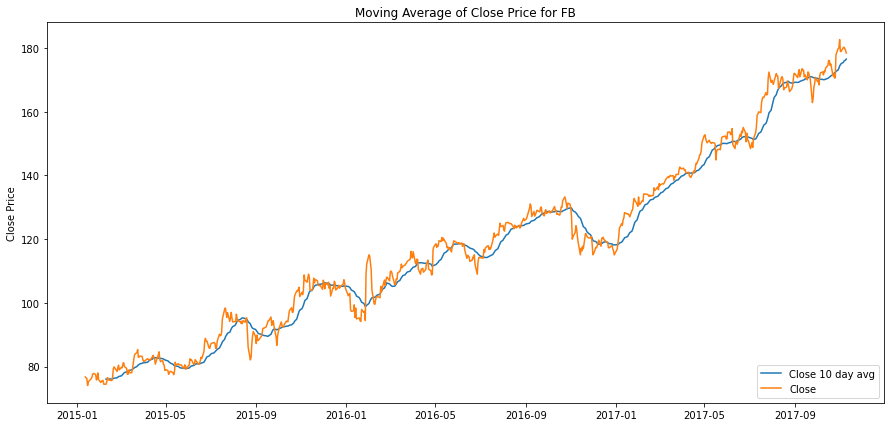

In [289]:
def plot_roll_avg_facebook():
    start = '2015-1-1'
    plt.figure(figsize=(15,7))    
    plt.plot(facebook.loc[start:, '20d'], label='Close 10 day avg')
    plt.plot(facebook.loc[start:, 'Close'], label='Close')
    plt.legend(loc=4)
    plt.title('Moving Average of Close Price for FB')
    plt.ylabel('Close Price')
plot_roll_avg_facebook()

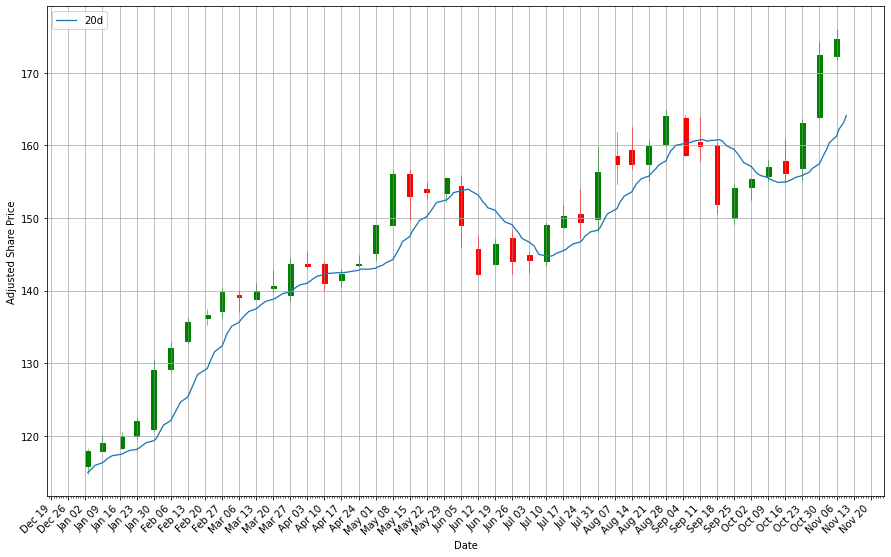

In [290]:
pandas_candlestick_ohlc(apple.loc['2017-1-1':], stick='week', otherseries='20d')


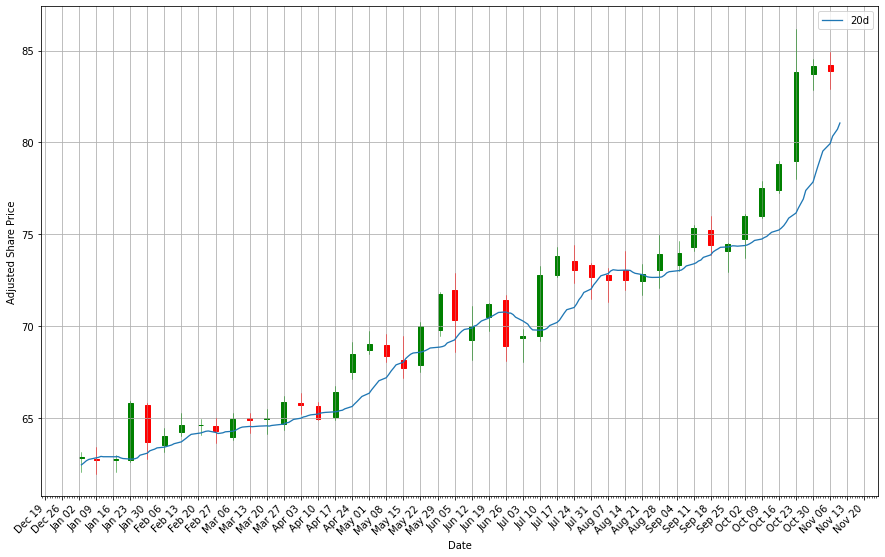

In [291]:
pandas_candlestick_ohlc(microsoft.loc['2017-1-1':], stick='week', otherseries='20d')


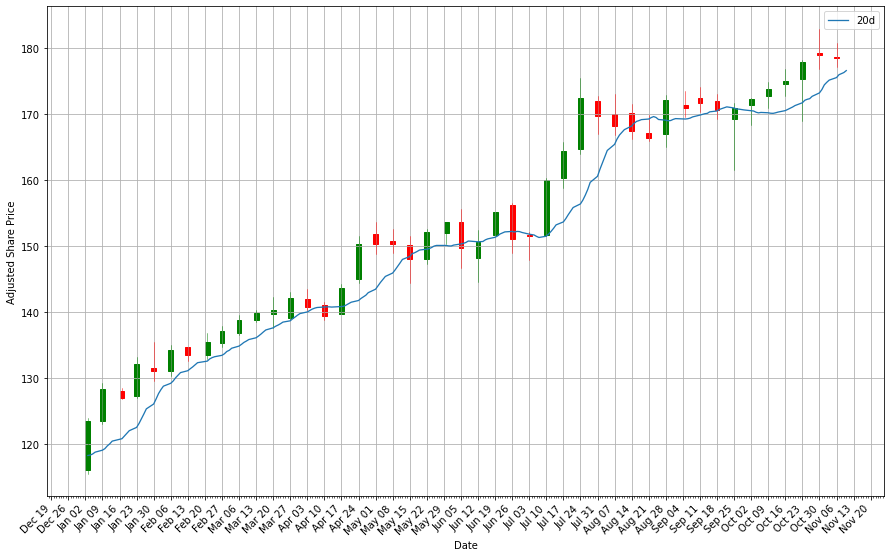

In [292]:
pandas_candlestick_ohlc(facebook.loc['2017-1-1':], stick='week', otherseries='20d')


In [293]:
apple['50d'] = apple['Close'].rolling(window=50, center=False).mean()
apple['200d'] = apple['Close'].rolling(window=200, center=False).mean()

In [294]:
microsoft['50d'] = microsoft['Close'].rolling(window=50, center=False).mean()
microsoft['200d'] = microsoft['Close'].rolling(window=200, center=False).mean()

In [295]:
facebook['50d'] = facebook['Close'].rolling(window=50, center=False).mean()
facebook['200d'] = facebook['Close'].rolling(window=200, center=False).mean()

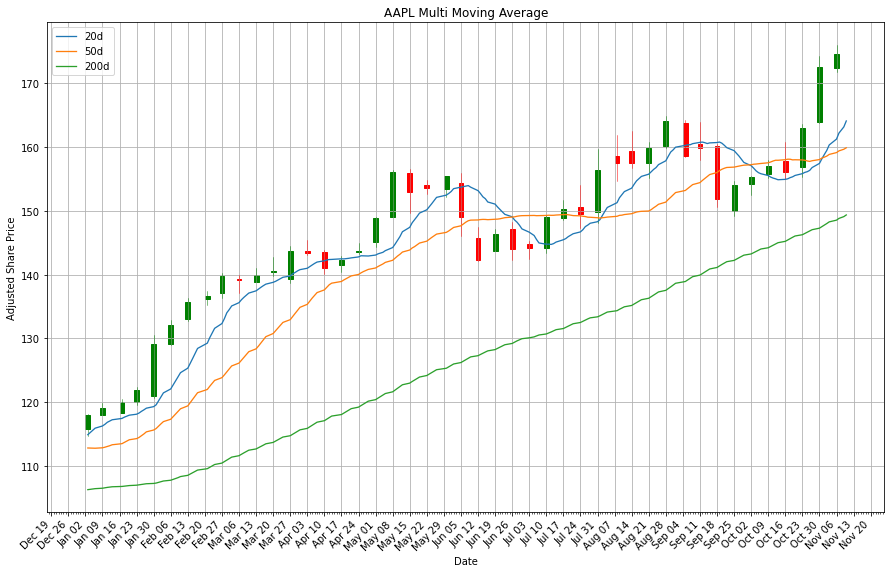

In [296]:
pandas_candlestick_ohlc(apple.loc['2017-1-1':], stick='week', 
                        otherseries=['20d', '50d', '200d'], 
                        title='AAPL Multi Moving Average'
                       )

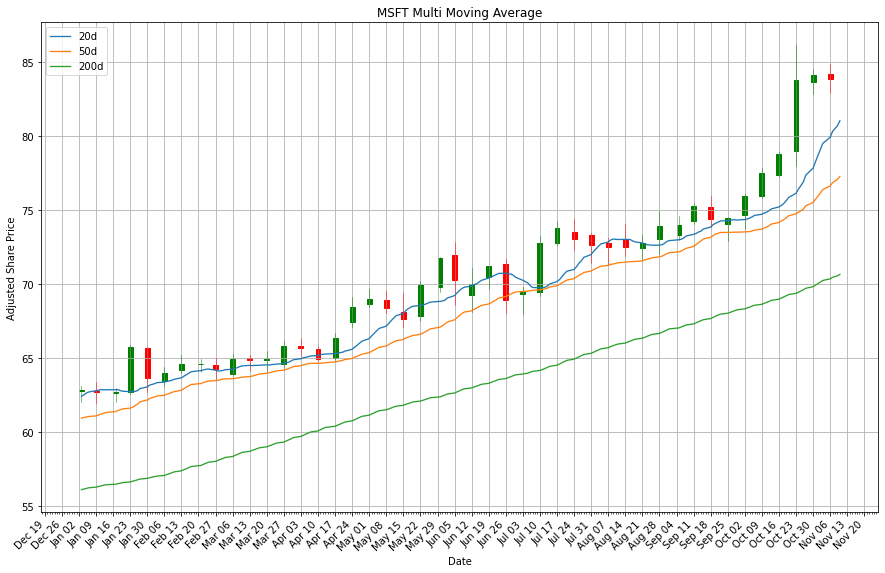

In [297]:
pandas_candlestick_ohlc(microsoft.loc['2017-1-1':], stick='week', 
                        otherseries=['20d', '50d', '200d'], 
                        title='MSFT Multi Moving Average'
                       )

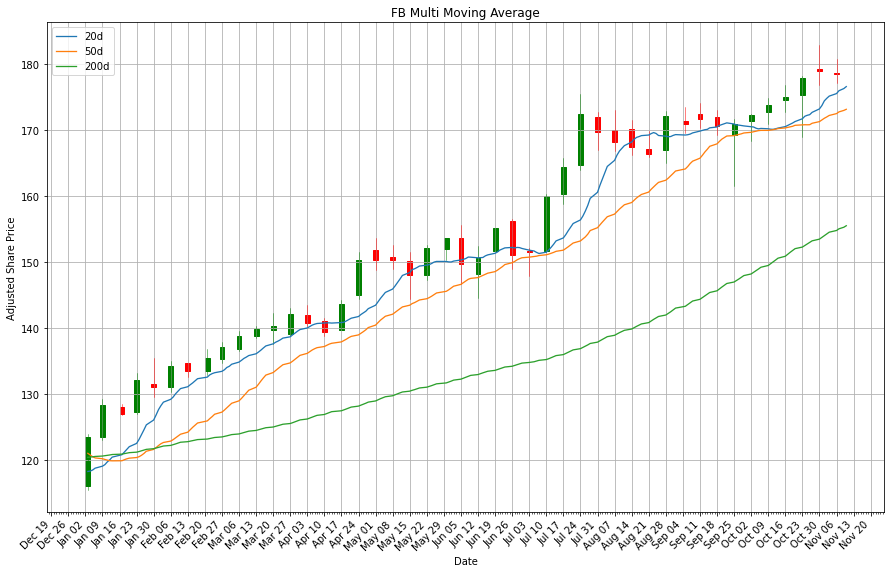

In [298]:
pandas_candlestick_ohlc(facebook.loc['2017-1-1':], stick='week', 
                        otherseries=['20d', '50d', '200d'], 
                        title='FB Multi Moving Average'
                       )

Crossovers of stocks on weekly basis allows for development of basic trading strategy, where a 20 day moving average that falls below a 50 day moving average is bearish sentiment, and vice versa is a bullish sentiment

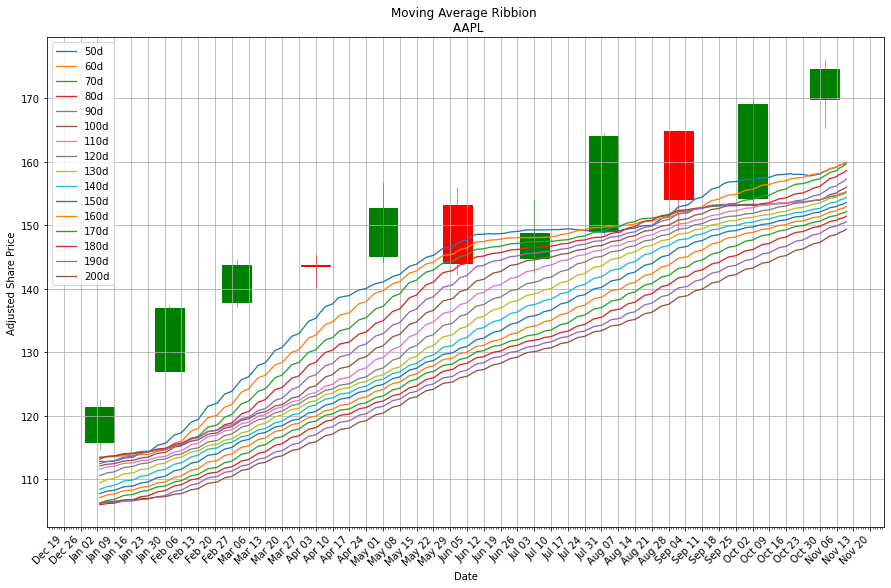

In [299]:
def moving_avg_ribbon(stock, start_dt=None, end_dt=None, stick='week'):
    stock = stock.copy()
    average_periods = [i for i in range(50, 201) if i % 10==0]
    for days in average_periods:
        label = str(days)+'d'
        stock[label] = stock['Close'].rolling(window=days, center=False).mean()
    labels = [str(days)+'d' for days in average_periods]
    pandas_candlestick_ohlc(stock.loc[start_dt:end_dt], stick=stick, 
                            otherseries=labels, 
                            title='Moving Average Ribbion \n AAPL'
                           )
moving_avg_ribbon(apple, start_dt='2017-1-1', stick='month')

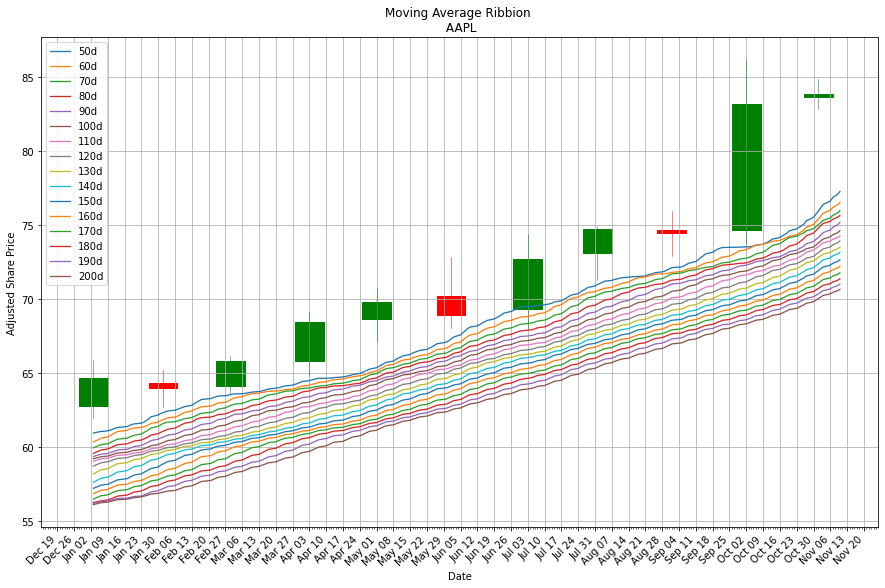

In [300]:
def moving_avg_ribbon(stock, start_dt=None, end_dt=None, stick='week'):
    stock = stock.copy()
    average_periods = [i for i in range(50, 201) if i % 10==0]
    for days in average_periods:
        label = str(days)+'d'
        stock[label] = stock['Close'].rolling(window=days, center=False).mean()
    labels = [str(days)+'d' for days in average_periods]
    pandas_candlestick_ohlc(stock.loc[start_dt:end_dt], stick=stick, 
                            otherseries=labels, 
                            title='Moving Average Ribbion \n AAPL'
                           )
moving_avg_ribbon(microsoft, start_dt='2017-1-1', stick='month')

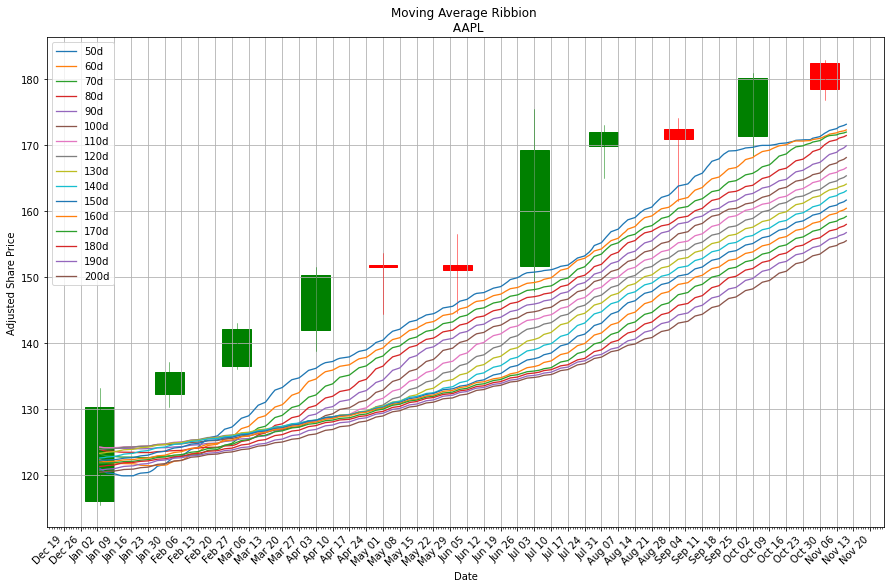

In [301]:
def moving_avg_ribbon(stock, start_dt=None, end_dt=None, stick='week'):
    stock = stock.copy()
    average_periods = [i for i in range(50, 201) if i % 10==0]
    for days in average_periods:
        label = str(days)+'d'
        stock[label] = stock['Close'].rolling(window=days, center=False).mean()
    labels = [str(days)+'d' for days in average_periods]
    pandas_candlestick_ohlc(stock.loc[start_dt:end_dt], stick=stick, 
                            otherseries=labels, 
                            title='Moving Average Ribbion \n AAPL'
                           )
moving_avg_ribbon(facebook, start_dt='2017-1-1', stick='month')

Use of Aforementioned Trading Strategy
We will purchase stock when the 20 day moving average crosses over the 50
We will sell when the 20 day moving average crosses below the 50

In [302]:
apple['20d-50d'] = apple['20d'] - apple['50d']
microsoft['20d-50d'] = microsoft['20d'] - microsoft['50d']
facebook['20d-50d'] = facebook['20d'] - facebook['50d']


In [303]:
apple["Regime"] = np.sign(apple['20d-50d'])
apple["Regime"] = apple["Regime"].fillna(0)

In [304]:
microsoft["Regime"] = np.sign(microsoft['20d-50d'])
microsoft["Regime"] = microsoft["Regime"].fillna(0)

In [305]:
facebook["Regime"] = np.sign(facebook['20d-50d'])
facebook["Regime"] = facebook["Regime"].fillna(0)

(736316.45, 736658.55, -2.0, 2.0)

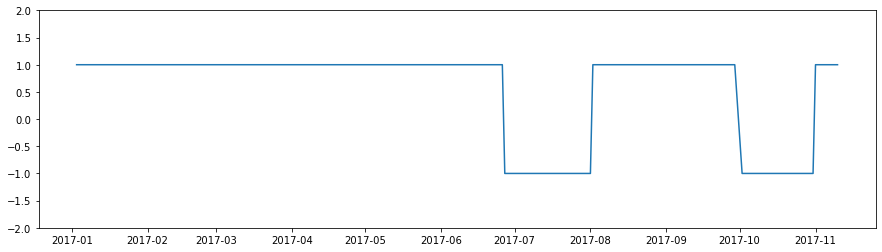

In [306]:
plt.figure(figsize=(15,4)) 
plt.plot(apple["Regime"].loc['2017-1-1':])
plt.axis(ymax=2, ymin=-2)

(736316.45, 736658.55, -2.0, 2.0)

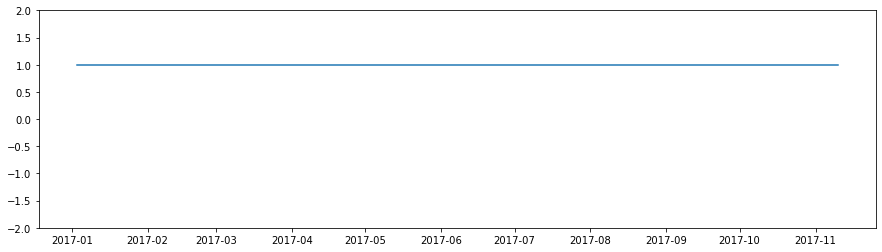

In [307]:
plt.figure(figsize=(15,4)) 
plt.plot(microsoft["Regime"].loc['2017-1-1':])
plt.axis(ymax=2, ymin=-2)

(736316.45, 736658.55, -2.0, 2.0)

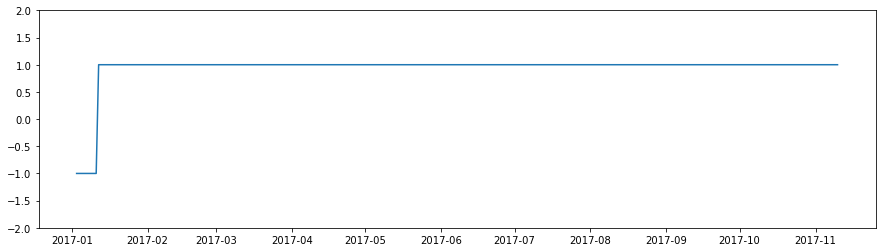

In [308]:
plt.figure(figsize=(15,4)) 
plt.plot(facebook["Regime"].loc['2017-1-1':])
plt.axis(ymax=2, ymin=-2)

In [309]:

apple["Signal"] = np.sign(apple["Regime"] - apple["Regime"].shift(1))
microsoft["Signal"] = np.sign(microsoft["Regime"] - microsoft["Regime"].shift(1))
facebook["Signal"] = np.sign(facebook["Regime"] - facebook["Regime"].shift(1))

In [310]:
apple.tail()
microsoft.tail()
facebook.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,20d,50d,200d,20d-50d,Regime,Signal
Date,,,,,,,,,,,,,,,,,,
2017-11-03,179.29,179.8600,176.71,178.92,17572587.0,0.0,1.0,179.29,179.8600,176.71,178.92,17572587.0,175.0965,172.1696,154.4937,2.9269,1.0,0.0
2017-11-06,178.56,180.4500,178.31,180.17,13065077.0,0.0,1.0,178.56,180.4500,178.31,180.17,13065077.0,175.4800,172.4466,154.7499,3.0334,1.0,0.0
2017-11-07,180.50,180.7478,178.96,180.25,12679885.0,0.0,1.0,180.50,180.7478,178.96,180.25,12679885.0,175.9130,172.7068,155.0043,3.2062,1.0,0.0
2017-11-09,178.31,179.4000,177.09,179.30,12460345.0,0.0,1.0,178.31,179.4000,177.09,179.30,12460345.0,176.2410,172.9318,155.2434,3.3092,1.0,0.0
2017-11-10,178.35,179.0999,177.96,178.46,10933405.0,0.0,1.0,178.35,179.0999,177.96,178.46,10933405.0,176.5365,173.1026,155.4718,3.4339,1.0,0.0


(735559.4, 736694.6, -2.0, 2.0)

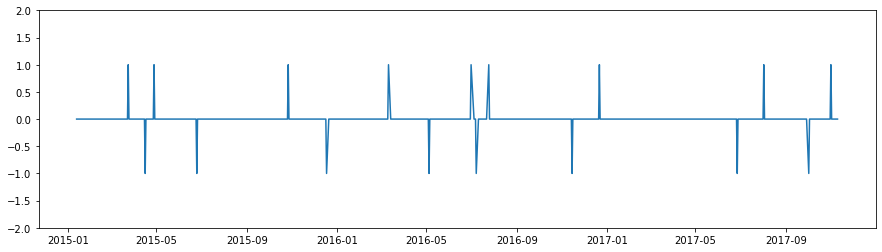

In [311]:
plt.figure(figsize=(15,4)) 
plt.plot(apple["Signal"])
plt.axis(ymax=2, ymin=-2)

(735559.4, 736694.6, -2.0, 2.0)

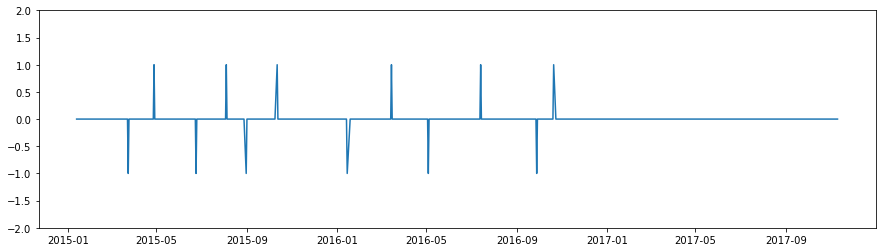

In [312]:
plt.figure(figsize=(15,4)) 
plt.plot(microsoft["Signal"])
plt.axis(ymax=2, ymin=-2)

(735559.4, 736694.6, -2.0, 2.0)

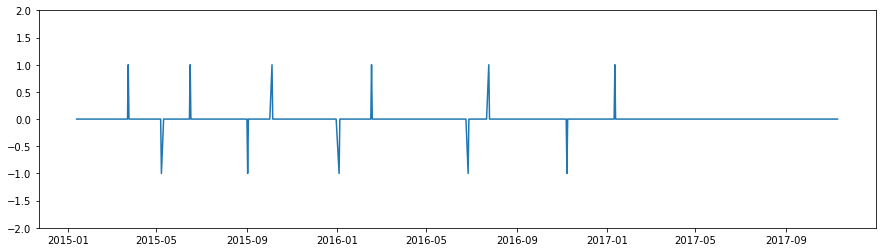

In [313]:
plt.figure(figsize=(15,4)) 
plt.plot(facebook["Signal"])
plt.axis(ymax=2, ymin=-2)

(735558.35, 736694.65, -2.0, 2.0)

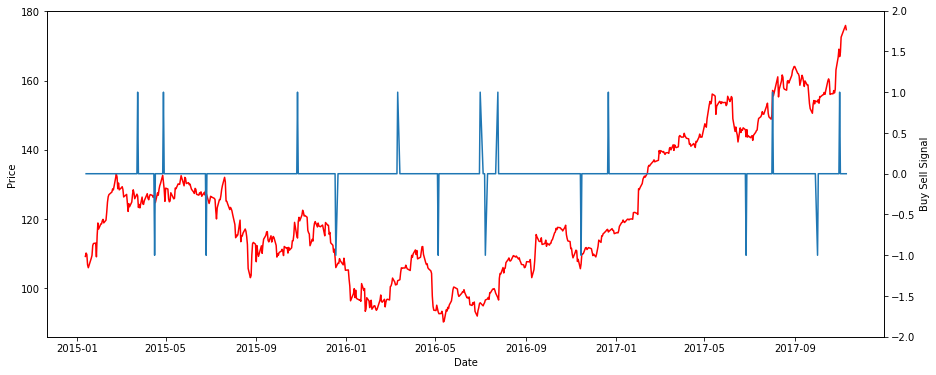

In [314]:
start = datetime.datetime(2015,1,1)
end = datetime.date.today()

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.plot(apple.loc[start:, 'Close'], label='Close', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2 = ax1.twinx()
ax2.plot(apple["Signal"])
ax2.set_ylabel('Buy Sell Signal')
ax2.axis(ymax=2, ymin=-2)
#Instances of Buy/Sell periods with graph overlay to demonstrate their respective pattern

(735558.35, 736694.65, -2.0, 2.0)

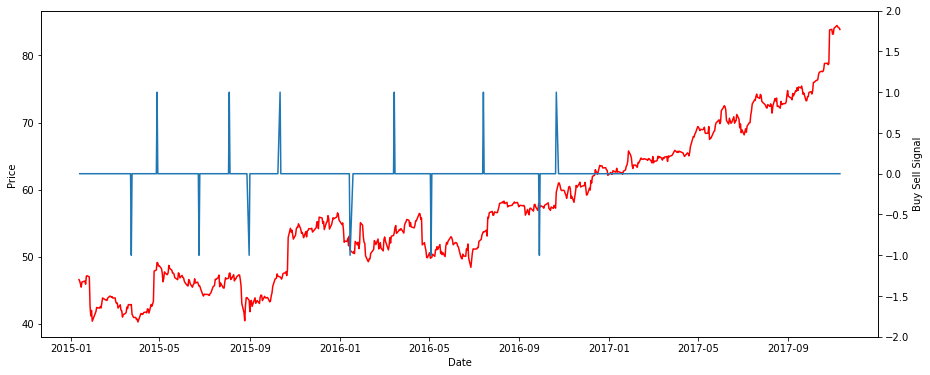

In [315]:
start = datetime.datetime(2015,1,1)
end = datetime.date.today()

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.plot(microsoft.loc[start:, 'Close'], label='Close', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2 = ax1.twinx()
ax2.plot(microsoft["Signal"])
ax2.set_ylabel('Buy Sell Signal')
ax2.axis(ymax=2, ymin=-2)
#Instances of Buy/Sell periods with graph overlay to demonstrate their respective pattern

(735558.35, 736694.65, -2.0, 2.0)

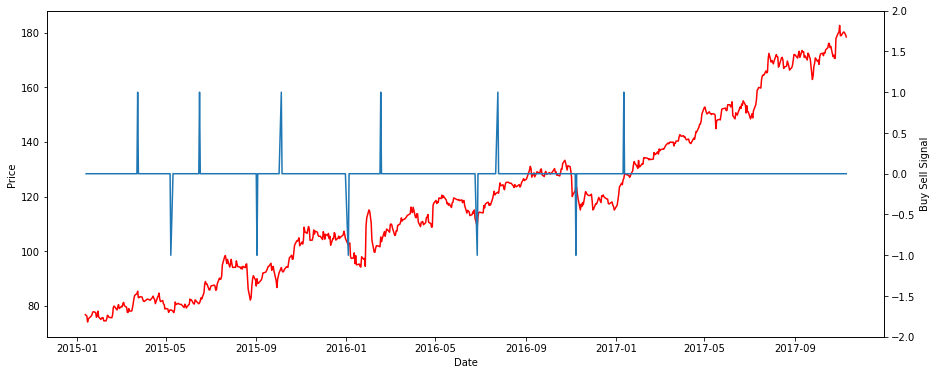

In [316]:
start = datetime.datetime(2015,1,1)
end = datetime.date.today()

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.plot(facebook.loc[start:, 'Close'], label='Close', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2 = ax1.twinx()
ax2.plot(facebook["Signal"])
ax2.set_ylabel('Buy Sell Signal')
ax2.axis(ymax=2, ymin=-2)
#Instances of Buy/Sell periods with graph overlay to demonstrate their respective pattern

In [317]:
def plot_purchase_windows(trade_df, symbol):
    plt.figure(figsize=(17,6)) 
    plt.plot(trade_df.loc[start:, 'Close'], label='Adjusted Close Price')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    buy_dates = list(trade_df.loc[trade_df["Signal"]==1,'Signal'].index)
    sell_dates = list(trade_df.loc[trade_df["Signal"]==-1,'Signal'].index)
    for buy_window in zip(buy_dates, sell_dates):
        plt.axvspan(buy_window[0], buy_window[1], alpha=0.5, color='green', label='Purchase Window')
    plt.title('Adjusted Close with Purchase Periods Shaded \n{}'.format(symbol))
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:2], labels[:2])


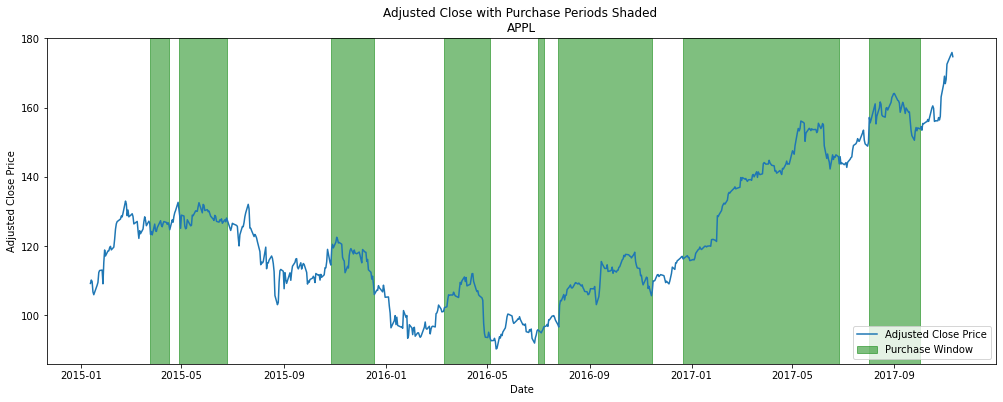

In [318]:
plot_purchase_windows(apple, 'APPL')
#Window of purchase according to our computations

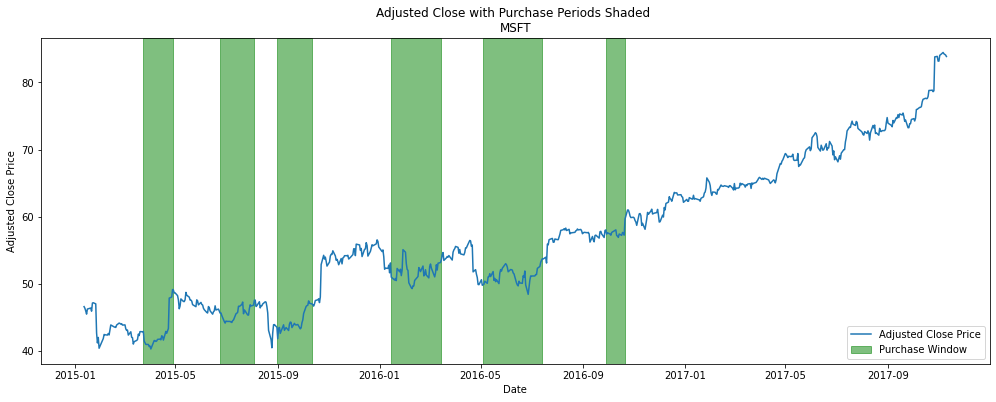

In [319]:
plot_purchase_windows(microsoft, 'MSFT')
#Window of purchase according to our computations

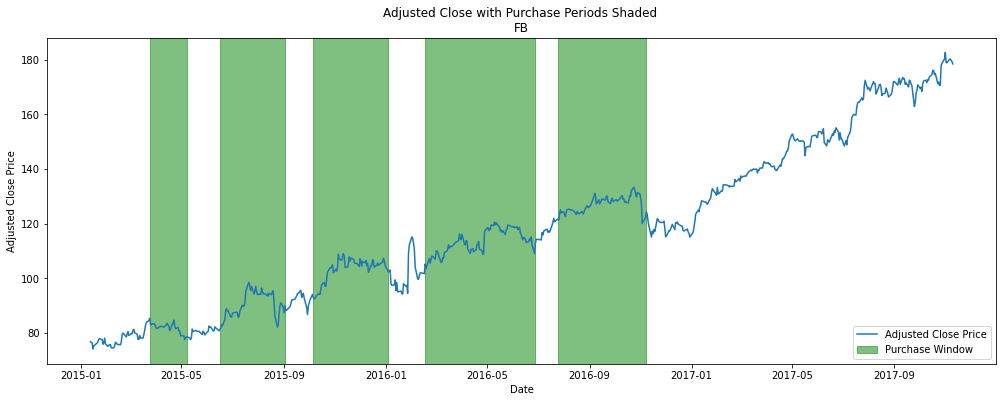

In [320]:
plot_purchase_windows(facebook, 'FB')
#Window of purchase according to our computations

In [321]:
apple_signals = pd.concat([
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == 1, "Close"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == -1, "Close"],
                     "Signal": "Sell"}),
    ])
apple_signals.sort_index(inplace = True)
apple_signals.head()
#Dataframe with trades and their respective price for apple

,Price,Signal
Date,,
2015-03-24,126.69,Buy
2015-04-16,126.17,Sell
2015-04-28,130.56,Buy
2015-06-25,127.50,Sell
2015-10-27,114.55,Buy


In [322]:
def signals_to_profits(stock_signals):
    buy_df = stock_signals[stock_signals['Signal']=='Buy'].reset_index().copy()
    sell_df = stock_signals[stock_signals['Signal']=='Sell'].reset_index()
    buy_df = buy_df.drop('Signal', axis=1)
    buy_df['End Date'] = sell_df['Date']
    buy_df['Profit'] = sell_df['Price'] - buy_df['Price']
    return buy_df.set_index('Date')

In [323]:
apple_long_profits = signals_to_profits(apple_signals)
apple_long_profits.head()

,Price,End Date,Profit
Date,,,
2015-03-24,126.69,2015-04-16,-0.52
2015-04-28,130.56,2015-06-25,-3.06
2015-10-27,114.55,2015-12-18,-8.52
2016-03-11,102.26,2016-05-05,-9.02
2016-07-01,95.89,2016-07-08,0.79


In [324]:
apple_long_profits['Profit'].sum()

13.560000000000016

Above is the average percentage gain due to our trades

In [326]:

#This function takes a list of stocks and determines 
#when each stock would be bought or sold depending on a moving average crossover strategy
#we used above, returning a data frame with information about when the stocks in the portfolio 
#are bought or sold
def ma_crossover_orders(stocks, fast, slow):
    
    fast_str = str(fast) + 'd'
    slow_str = str(slow) + 'd'
    ma_diff_str = fast_str + '-' + slow_str
 
    trades = pd.DataFrame({"Price": [], "Regime": [], "Signal": []})
    for s in stocks:
        # Get the moving averages and differences in the moving averages
        s[1][fast_str] = np.round(s[1]["Close"].rolling(window = fast, center = False).mean(), 2)
        s[1][slow_str] = np.round(s[1]["Close"].rolling(window = slow, center = False).mean(), 2)
        s[1][ma_diff_str] = s[1][fast_str] - s[1][slow_str]
 
        s[1]["Regime"] = np.where(s[1][ma_diff_str] > 0, 1, 0)
        # We have 1's for bullish and 0's for everything else. 
        s[1]["Regime"] = np.where(s[1][ma_diff_str] < 0, -1, s[1]["Regime"])
        # Temporarily change the regime of the last row to 0 so all trades are filled
        regime_orig = s[1].loc[:, "Regime"].iloc[-1]
        s[1].loc[:, "Regime"].iloc[-1] = 0
        s[1]["Signal"] = np.sign(s[1]["Regime"] - s[1]["Regime"].shift(1))
        # Restore original data
        s[1].loc[:, "Regime"].iloc[-1] = regime_orig
 
        # Get signals
        signals = pd.concat([
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == 1, "Adj. Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == 1, "Regime"],
                         "Signal": "Buy"}),
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == -1, "Adj. Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == -1, "Regime"],
                         "Signal": "Sell"}),
        ])
        signals.index = pd.MultiIndex.from_product([signals.index, [s[0]]], names = ["Date", "Symbol"])
        trades = trades.append(signals)
 
    trades.sort_index(inplace = True)
    trades.index = pd.MultiIndex.from_tuples(trades.index, names = ["Date", "Symbol"])
 
    return trades
 
 
def backtest(signals, cash, port_value = .1, batch = 100):
 
    SYMBOL = 1 
    portfolio = dict()  
    port_prices = dict()
    results = pd.DataFrame({"Start Cash": [],
                            "End Cash": [],
                            "Portfolio Value": [],
                            "Type": [],
                            "Shares": [],
                            "Share Price": [],
                            "Trade Value": [],
                            "Profit per Share": [],
                            "Total Profit": []})
 
    for index, row in signals.iterrows():
        shares = portfolio.setdefault(index[SYMBOL], 0)
        trade_val = 0
        batches = 0
        cash_change = row["Price"] * shares 
        portfolio[index[SYMBOL]] = 0  
 
        old_price = port_prices.setdefault(index[SYMBOL], row["Price"])
        portfolio_val = 0
        for key, val in portfolio.items():
            portfolio_val += val * port_prices[key]
 
        if row["Signal"] == "Buy" and row["Regime"] == 1:  
            batches = np.floor((portfolio_val + cash) * port_value) // np.ceil(batch * row["Price"]) 
            trade_val = batches * batch * row["Price"] 
            # How much money is put on the line with each trade
            cash_change -= trade_val  
            # We are buying shares so cash will go down
            portfolio[index[SYMBOL]] = batches * batch  
            # Recording how many shares are currently invested in the stock
            port_prices[index[SYMBOL]] = row["Price"]   
            # Record price
            old_price = row["Price"]
        elif row["Signal"] == "Sell" and row["Regime"] == -1: 
            pass
        pprofit = row["Price"] - old_price   
        # Profit per share; old_price is set in such a way that entering a position results in a profit of zero
 
        # Update report
        results = results.append(pd.DataFrame({
                "Start Cash": cash,
                "End Cash": cash + cash_change,
                "Portfolio Value": cash + cash_change + portfolio_val + trade_val,
                "Type": row["Signal"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": abs(cash_change),
                "Profit per Share": pprofit,
                "Total Profit": batches * batch * pprofit
            }, index = [index]))
        cash += cash_change  # Change to cash balance to yield true
 
    results.sort_index(inplace = True)
    results.index = pd.MultiIndex.from_tuples(results.index, names = ["Date", "Symbol"])
 
    return results
 
# MOOOOREEEEE
(microsoft, google, facebook, twitter, netflix,amazon) = (quandl.get("WIKI/" + s, start_date="2015-11-11", end_date="2017-11-11") 
 for s in ["MSFT", "GOOG", "FB", "TWTR","NFLX", "AMZN"])

In [ ]:
signals = ma_crossover_orders([("AAPL", apple),
                              ("MSFT",  microsoft),
                              ("GOOG",  google),
                              ("FB",    facebook),
                              ("TWTR",  twitter),
                              ("NFLX",  netflix),
                              ("AMZN",  amazon)],
                            fast = 20, slow = 50)
signals


In [ ]:
bk = backtest(signals, 1000000)
bk

In [ ]:
bk["Portfolio Value"].groupby(level=0).apply(lambda x: x[-1]).plot()

With 100% portfolio investment, the portfolio grows by 40% across the period of January 2015 to November of 2017